In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
plt.style.use('../paper.mplstyle')

from glob import glob

from scipy.interpolate import 
interp1d
from scipy.optimize import ridder, minimize
from scipy.stats import chi2
from matplotlib import colors

In [2]:
h5f.keys()

NameError: name 'h5f' is not defined

In [3]:
h5f = h5.File("/data/ana/BSM/IC86_all_energy_solar_WIMP/data/trials/ps_trials.h5", "r")
for idx, v in enumerate(h5f.values()):
    if v.attrs["norm"]==0:
        break
tss = np.where(v[:, 3]<0, 0, v[:, 3])

subdivision = 10
bins = np.linspace(
    0,
    np.ceil(subdivision * tss.max()) / subdivision,
    int(np.ceil(subdivision * tss.max())) + 1
)
cents = (bins[1:] + bins[:-1]) / 2
widths = bins[1:] - bins[:-1]

h, _ = np.histogram(tss, bins=bins)
h = h / h.sum()
h = h / widths

bg90 = np.quantile(tss, 0.9)

In [4]:
we = np.zeros(h.shape)
we[0] = 1.0 / widths[0]

m = h > 0

f = lambda x: (1 - x[1]) * chi2.pdf(cents[m], x[0]) + x[1] * we[m]

g = lambda x: np.abs((f(x) - h[m])/ h[m]).sum()

res = minimize(g, [0.5, 0.5], bounds=[(0.01,2), (0, 1)])

In [5]:
c = (237/255, 113/255, 75 / 255)

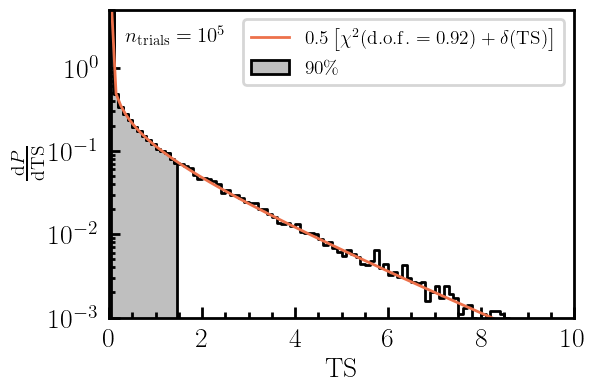

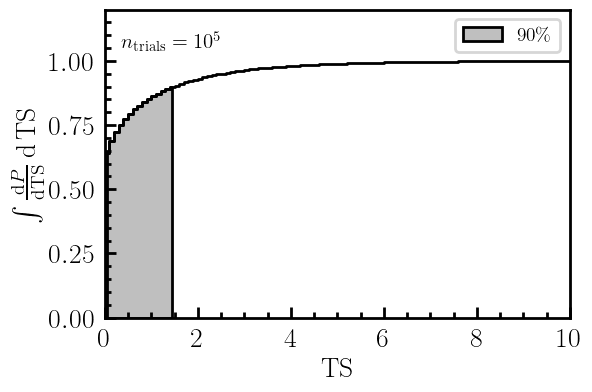

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
[border.set_linewidth(2) for border in ax.spines.values()]

ax.step(
    cents,
    h,
    where="mid",
    color="k",
)

ax.fill_between(
    cents[cents<bg90],
    h[cents<bg90],
    step="mid",
    facecolor=colors.to_rgb("k") + (0.25,),
    edgecolor="k",
    label=r"$90\%$"
)

ax.plot(
    cents[h>0],
    f(res.x),
    color=c,
#     color="darkorange",
    label=r"$0.5\left[\chi^{2}({\rm{d.o.f.=0.92}})+\delta({\rm{TS}})\right]$",
)

ax.text(0.35, 2, r"$n_{\rm{trials}}=10^5$", fontsize=15)

ax.set(
    yscale="log",
    xlim=(bins.min(), 10),
    ylim=(1e-3, 5),
    ylabel=r"$\frac{{\rm{d}}P}{{\rm{d}}{\rm{TS}}}$",
    xlabel=r"${\rm{TS}}$",
)

ax.legend(fontsize=14, loc=1)

plt.savefig("figures/background_ts_pdf.pdf")

plt.show()


fig, ax = plt.subplots(figsize=(6,4))
[border.set_linewidth(2) for border in ax.spines.values()]

ax.step(cents, np.cumsum(h * widths), where="mid", color="k")

ax.fill_between(
    cents[cents<bg90],
    np.cumsum(h[cents<bg90] * widths[cents<bg90]),
    step="mid",
    facecolor=colors.to_rgb("k") + (0.25,),
    label=r"$90\%$",
    edgecolor="k"
)

ax.set(
#     yscale="log",
    xlim=(bins.min(), 10),
    ylim=(0, 1.2),
    ylabel=r"$\int\frac{{\rm{d}}P}{{\rm{d}}{\rm{TS}}}\,{\rm{d}}\,{\rm{TS}}$",
    xlabel=r"${\rm{TS}}$",
)

ax.text(0.35, 1.05, r"$n_{\rm{trials}}=10^5$", fontsize=15)
ax.legend(fontsize=14, loc=1)
plt.savefig("figures/background_ts_cdf.pdf")

plt.show()


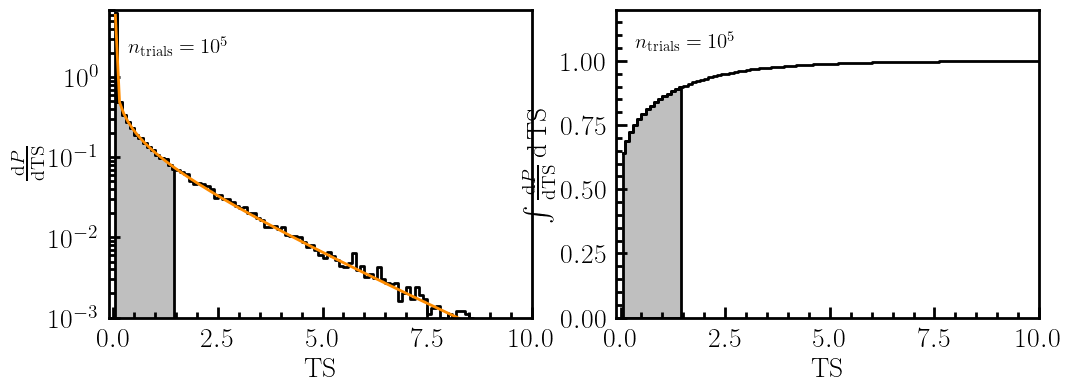

In [7]:
fig, axs = plt.subplots(figsize=(12, 4), ncols=2)

ax = axs[0]

[border.set_linewidth(2) for border in ax.spines.values()]

ax.step(cents, h, where="mid", color="k")

ax.fill_between(
    cents[cents<bg90],
    h[cents<bg90],
    step="mid",
    facecolor=colors.to_rgb("k") + (0.25,),
    edgecolor="k"
)

ax.plot(cents[m], f(res.x), color="darkorange")
# ax.plot(cents, chi2.pdf(cents, 1), color="crimson")

ax.text(0.35, 2, r"$n_{\rm{trials}}=10^5$", fontsize=15)

ax.set(
    yscale="log",
    xlim=(-0.1, 10),
    ylim=(1e-3, 7),
    ylabel=r"$\frac{{\rm{d}}P}{{\rm{d}}{\rm{TS}}}$",
    xlabel=r"${\rm{TS}}$",
)


ax = axs[1]

[border.set_linewidth(2) for border in ax.spines.values()]

ax.step(cents, np.cumsum(h * widths), where="mid", color="k")

ax.fill_between(
    cents[cents<bg90],
    np.cumsum(h[cents<bg90] * widths[cents<bg90]),
    step="mid",
    facecolor=colors.to_rgb("k") + (0.25,),
    edgecolor="k"
)

ax.set(
#     yscale="log",
    xlim=(-0.1, 10),
    ylim=(0, 1.2),
    ylabel=r"$\int\frac{{\rm{d}}P}{{\rm{d}}{\rm{TS}}}\,{\rm{d}}\,{\rm{TS}}$",
    xlabel=r"${\rm{TS}}$",
)

ax.text(0.35, 1.05, r"$n_{\rm{trials}}=10^5$", fontsize=15)

plt.show()


In [8]:
h5f = h5.File("/data/ana/BSM/IC86_all_energy_solar_WIMP/data/trials/ps_trials.h5", "r")
norms = []
medians = np.empty((len(h5f.keys()), 3))
background_quants = [0.9, 0.95, 0.99, 0.999]

for idx, v in enumerate(h5f.values()):
    norms.append(v.attrs["norm"])
    if v.attrs["norm"]==0:
        background_stuff = np.quantile(v[:][:, 3], background_quants)
    medians[idx, :] = np.quantile(v[:][:, 3], [0.16, 0.5, 0.84])
    
sorter = np.argsort(norms)
norms = np.array(norms)[sorter]
medians = medians[sorter]


In [11]:
pwd

'/mnt/ceph1-npx/ana/BSM/IC86_all_energy_solar_WIMP/solar_WIMP_v2/notebooks'

2.5502427345577616


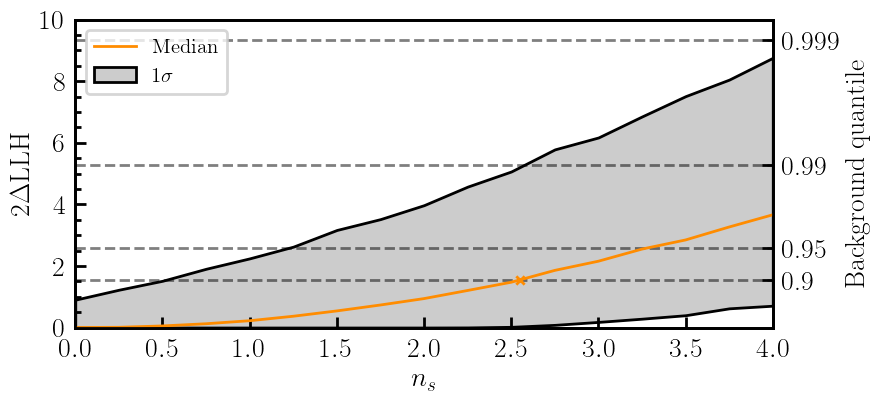

In [13]:
bg_90 = background_stuff[0]
interp_q50 = interp1d(norms, medians[:, 1])
f = lambda x: interp_q50(x) - bg90
sens_norm = ridder(f, norms.min(), norms.max())
print(sens_norm)
    
fig, ax = plt.subplots(figsize=(9,4))
[border.set_linewidth(2) for border in ax.spines.values()]
    
ax.plot(norms, medians[:, 1], zorder=10, color="darkorange", label="Median")

ax.fill_between(
    norms,
    medians[:, 0],
    medians[:, 2],
    zorder=0, 
    color=colors.to_rgb("k") + (0.2,),
    edgecolor="k",
    label=r"$1\sigma$"
)

ax.scatter(sens_norm, bg_90, zorder=20, c="darkorange", marker="x")

ax2 = ax.twinx()

ax.set_ylim(0, 10)
ax2.set_ylim(0, 10)

yticks2 = background_stuff
ax2.set_yticks(yticks2)
ax2.set_yticklabels(background_quants)

ax.set_ylabel(r"$2\Delta{\rm{LLH}}$")
ax2.set_ylabel(r"Background quantile")

ax.set_xlabel(r"$n_{s}$")

ax.set_xlim(norms.min(), norms.max())
ax2.minorticks_off()

ax.legend(loc=2, fontsize=15)

for val in background_stuff:
    
    ax.axhline(val, zorder=1, ls="--", color="k", alpha=0.5)

# plt.title(model.replace("_", "-"), fontsize=14)
plt.savefig("figures/ts_vs_ns.pdf", transparent=True)
plt.show()

In [10]:
def plot_trials_hist(h, cents, figname="", show=True, **kwargs):
        
    figsize = (6,4)
    if "figsize" in kwargs:
        figsize = kwargs["figsize"]
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.step(cents, h, where="mid", zorder=10)
    
    if "median" in kwargs:
        ax.axvline(kwargs["median"], color="crimson", zorder=1)
    
    ax.axvline(2.71, c="k", ls="--", alpha=0.5)
        
    # Configure x axis
    xmin = 0
    xmax = np.max(cents)
    xlabel = r"$\Delta\chi^{2}$"
    if "xmin" in kwargs:
        xmin = kwargs["xmin"]
    if "xmax" in kwargs:
        xmax = kwargs["xmax"]
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(xlabel)
    
    # Configure y-axis
    ymin = 0
    ymax = None
    if "ymax" in kwargs:
        ymax = kwargs["ymax"]
    ylabel = r"$\frac{{\rm{d}}P}{{\rm{d}}\Delta\chi^{2}}$"
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(ylabel)
    
    # Configure text
    if "text" in kwargs:
        if ymax is None:
            ymax = h.max()
        ax.text(1, 0.9*ymax, kwargs["text"])
    
    [border.set_linewidth(2) for border in ax.spines.values()]
    
    if "plot_chi2" in kwargs:
        if  kwargs["plot_chi2"]:
            ax.plot(cents, chi2.pdf(cents, 1), label=r"$\chi^{2}$ (d.o.f=1)")
            ax.legend(fontsize=15)
    
    if figname:
        plt.savefig(figname)
    if show:
        plt.show()
    plt.close()